In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Dimension Reduction (Boyut Azaltma)
### 1- Feature Selection (seçme)
### 2- Feature Extraction (çıkarma): a) Factor based b) projection based
#### Factor based algoritmalar : i: Faktör analizi ii: PCA (temel bileşenler analizi) iii: ICA

In [2]:
# Principal Component Analysis (PCA - Tenek Bileşenler Analizi)

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
canser = load_breast_cancer()
df = pd.DataFrame(canser["data"],columns=canser["feature_names"])
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [7]:
df.shape

(569, 30)

In [9]:
scaler = StandardScaler()
scaler.fit(df)
scaler_data = scaler.transform(df)

In [12]:
pca = PCA(n_components=3)
pca.fit(scaler_data)
x_pca = pca.transform(scaler_data)

In [14]:
print(scaler_data.shape)
print(x_pca.shape)

(569, 30)
(569, 3)


Text(0, 0.5, 'Second Principle Component')

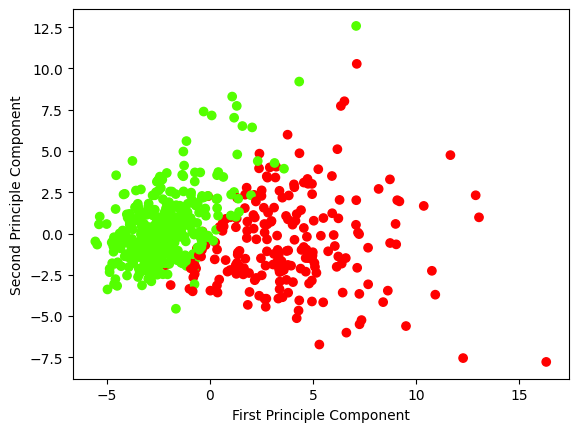

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c = canser["target"],cmap='prism')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

# Random Forest Alg

In [26]:
dataset = pd.read_csv("data/Social_Network_Ads.csv")
X = dataset.iloc[:,[2,3]]
y = dataset.iloc[:,-1]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 10, criterion="entropy", random_state=0)
classifier.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [34]:
y_pred = classifier.predict(X_test)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


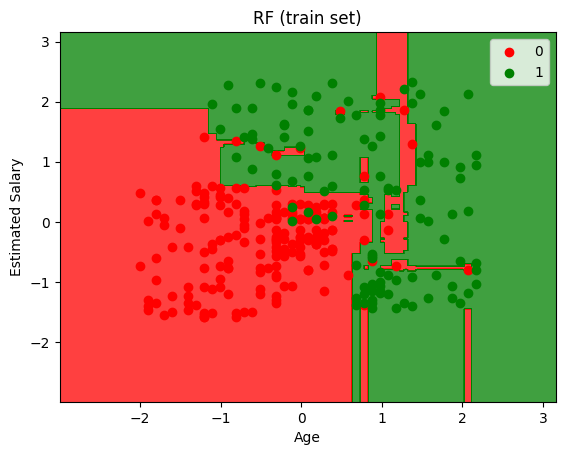

In [36]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('RF (train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


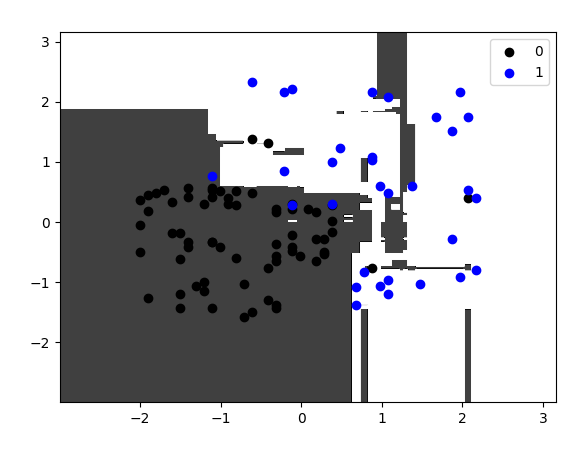

In [38]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01),)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('black','white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('black','blue'))(i), label = j)
plt.title('RF (test set)', color = "w")
plt.xlabel('Age',color = "w")
plt.ylabel('Estimated Salary',color = "w")
plt.legend()
plt.show()